📊 Student Performance Dataset Loaded Successfully!
Shape: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



🧾 Available Columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Selected Features: ['studytime', 'failures', 'absences', 'G1', 'G2']
Target Variable: G3

🔹 Linear Regression Results:
studytime: -0.0712
failures: -0.4558
absences: 0.0392
G1: 0.1445
G2: 0.9796
Intercept: -1.6213
MSE: 4.4665
R²: 0.7822

🔹 Ridge Regression Results:
studytime: -0.0707
failures: -0.4530
absences: 0.0392
G1: 0.1451
G2: 0.9791
Intercept: -1.6249
MSE: 4.4641
R²: 0.7823

🔹 Lasso Regression Results:
studytime: -0.0000
failures: -0.2542
absences: 0.0376
G1: 0.1411
G2: 0.9857
Intercept: -1.8533
MSE: 4.3490
R²: 0.7879

📋 Model Performance Comparison:


,Model,MSE,R² Score
0,Linear Regression,4.466503,0.782175
1,Ridge Regression,4.464120,0.782292
2,Lasso Regression,4.348982,0.787907


🏆 Best Performing Model (Lowest MSE): Lasso Regression


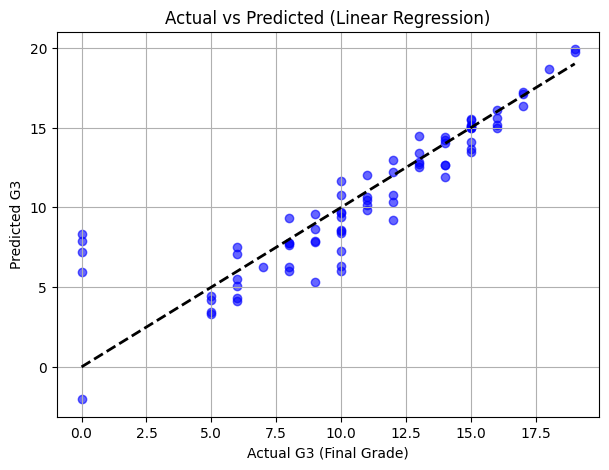

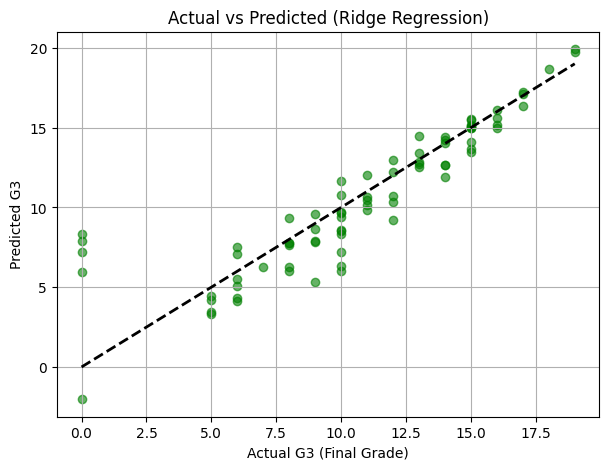

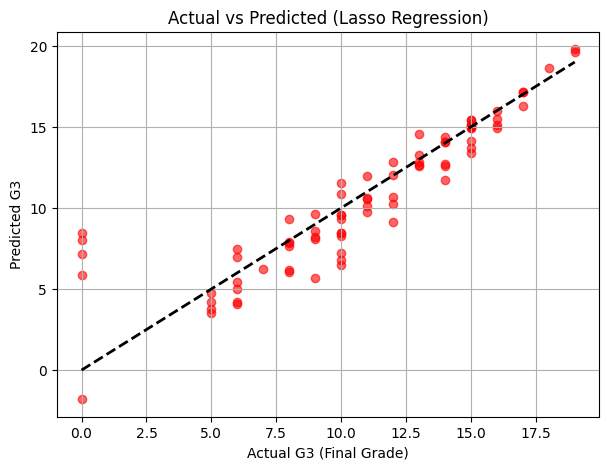

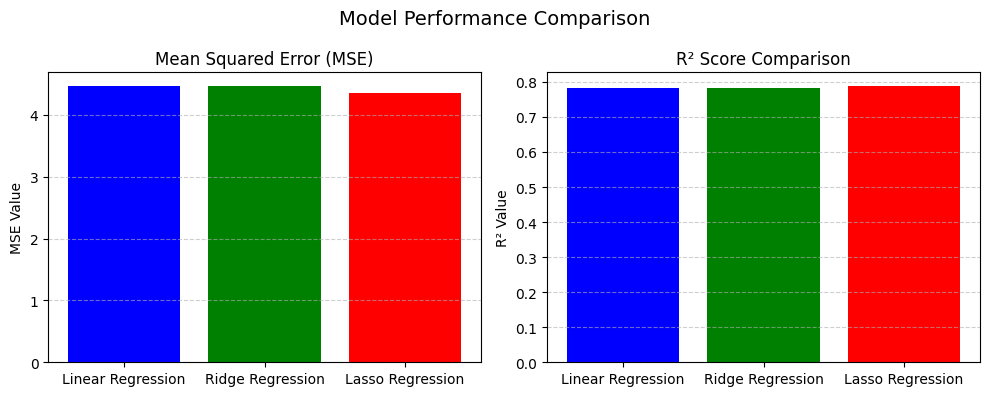


🧾 Actual vs Predicted (Sample 10 values):


,Actual G3,Linear Pred,Ridge Pred,Lasso Pred
0,10,6.01,6.02,6.47
1,12,12.20,12.20,12.06
2,5,3.43,3.43,3.55
3,10,8.52,8.52,8.45
4,9,7.87,7.88,8.19
5,13,12.70,12.70,12.65
6,18,18.69,18.69,18.65
7,6,7.10,7.10,6.99
8,0,7.23,7.23,7.16
9,14,12.64,12.64,12.59


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset (Working GitHub Link)
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv"
df = pd.read_csv(url, sep=',')  # Notice comma separator, not semicolon

print("📊 Student Performance Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# Step 3: Inspect Column Names
print("\n🧾 Available Columns:")
print(list(df.columns))

# Step 4: Select Useful Numeric Features for Regression
# (Make sure these columns exist in the dataset)
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'

X = df[features]
y = df[target]

print("\nSelected Features:", features)
print("Target Variable:", target)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------------------
# Step 6: Linear Regression
# ------------------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n🔹 Linear Regression Results:")
for feature, coef in zip(features, lin_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"MSE: {mse_linear:.4f}")
print(f"R²: {r2_linear:.4f}")

# ------------------------------------------
# Step 7: Ridge Regression
# ------------------------------------------
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n🔹 Ridge Regression Results:")
for feature, coef in zip(features, ridge_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {ridge_reg.intercept_:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")

# ------------------------------------------
# Step 8: Lasso Regression
# ------------------------------------------
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n🔹 Lasso Regression Results:")
for feature, coef in zip(features, lasso_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {lasso_reg.intercept_:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"R²: {r2_lasso:.4f}")

# ------------------------------------------
# Step 9: Comparison Table
# ------------------------------------------
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [mse_linear, mse_ridge, mse_lasso],
    'R² Score': [r2_linear, r2_ridge, r2_lasso]
})
print("\n📋 Model Performance Comparison:")
display(comparison)

best_model = comparison.loc[comparison['MSE'].idxmin(), 'Model']
print(f"🏆 Best Performing Model (Lowest MSE): {best_model}")

# ------------------------------------------
# Step 10: Scatter Plots (Actual vs Predicted) - Separate Graphs
# ------------------------------------------

# Plot for Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual G3 (Final Grade)")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()

# Plot for Ridge Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted (Ridge Regression)")
plt.xlabel("Actual G3 (Final Grade)")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()

# Plot for Lasso Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted (Lasso Regression)")
plt.xlabel("Actual G3 (Final Grade)")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()

# ------------------------------------------
# Step 11: Bar Charts for MSE & R²
# ------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(comparison['Model'], comparison['MSE'], color=['blue','green','red'])
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.bar(comparison['Model'], comparison['R² Score'], color=['blue','green','red'])
plt.title("R² Score Comparison")
plt.ylabel("R² Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle("Model Performance Comparison", fontsize=14)
plt.tight_layout()
plt.show()

# ------------------------------------------
# Step 12: Actual vs Predicted Table
# ------------------------------------------
pred_df = pd.DataFrame({
    'Actual G3': y_test.values[:10],
    'Linear Pred': np.round(y_pred_linear[:10], 2),
    'Ridge Pred': np.round(y_pred_ridge[:10], 2),
    'Lasso Pred': np.round(y_pred_lasso[:10], 2)
})
print("\n🧾 Actual vs Predicted (Sample 10 values):")
display(pred_df)

Categorical Features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


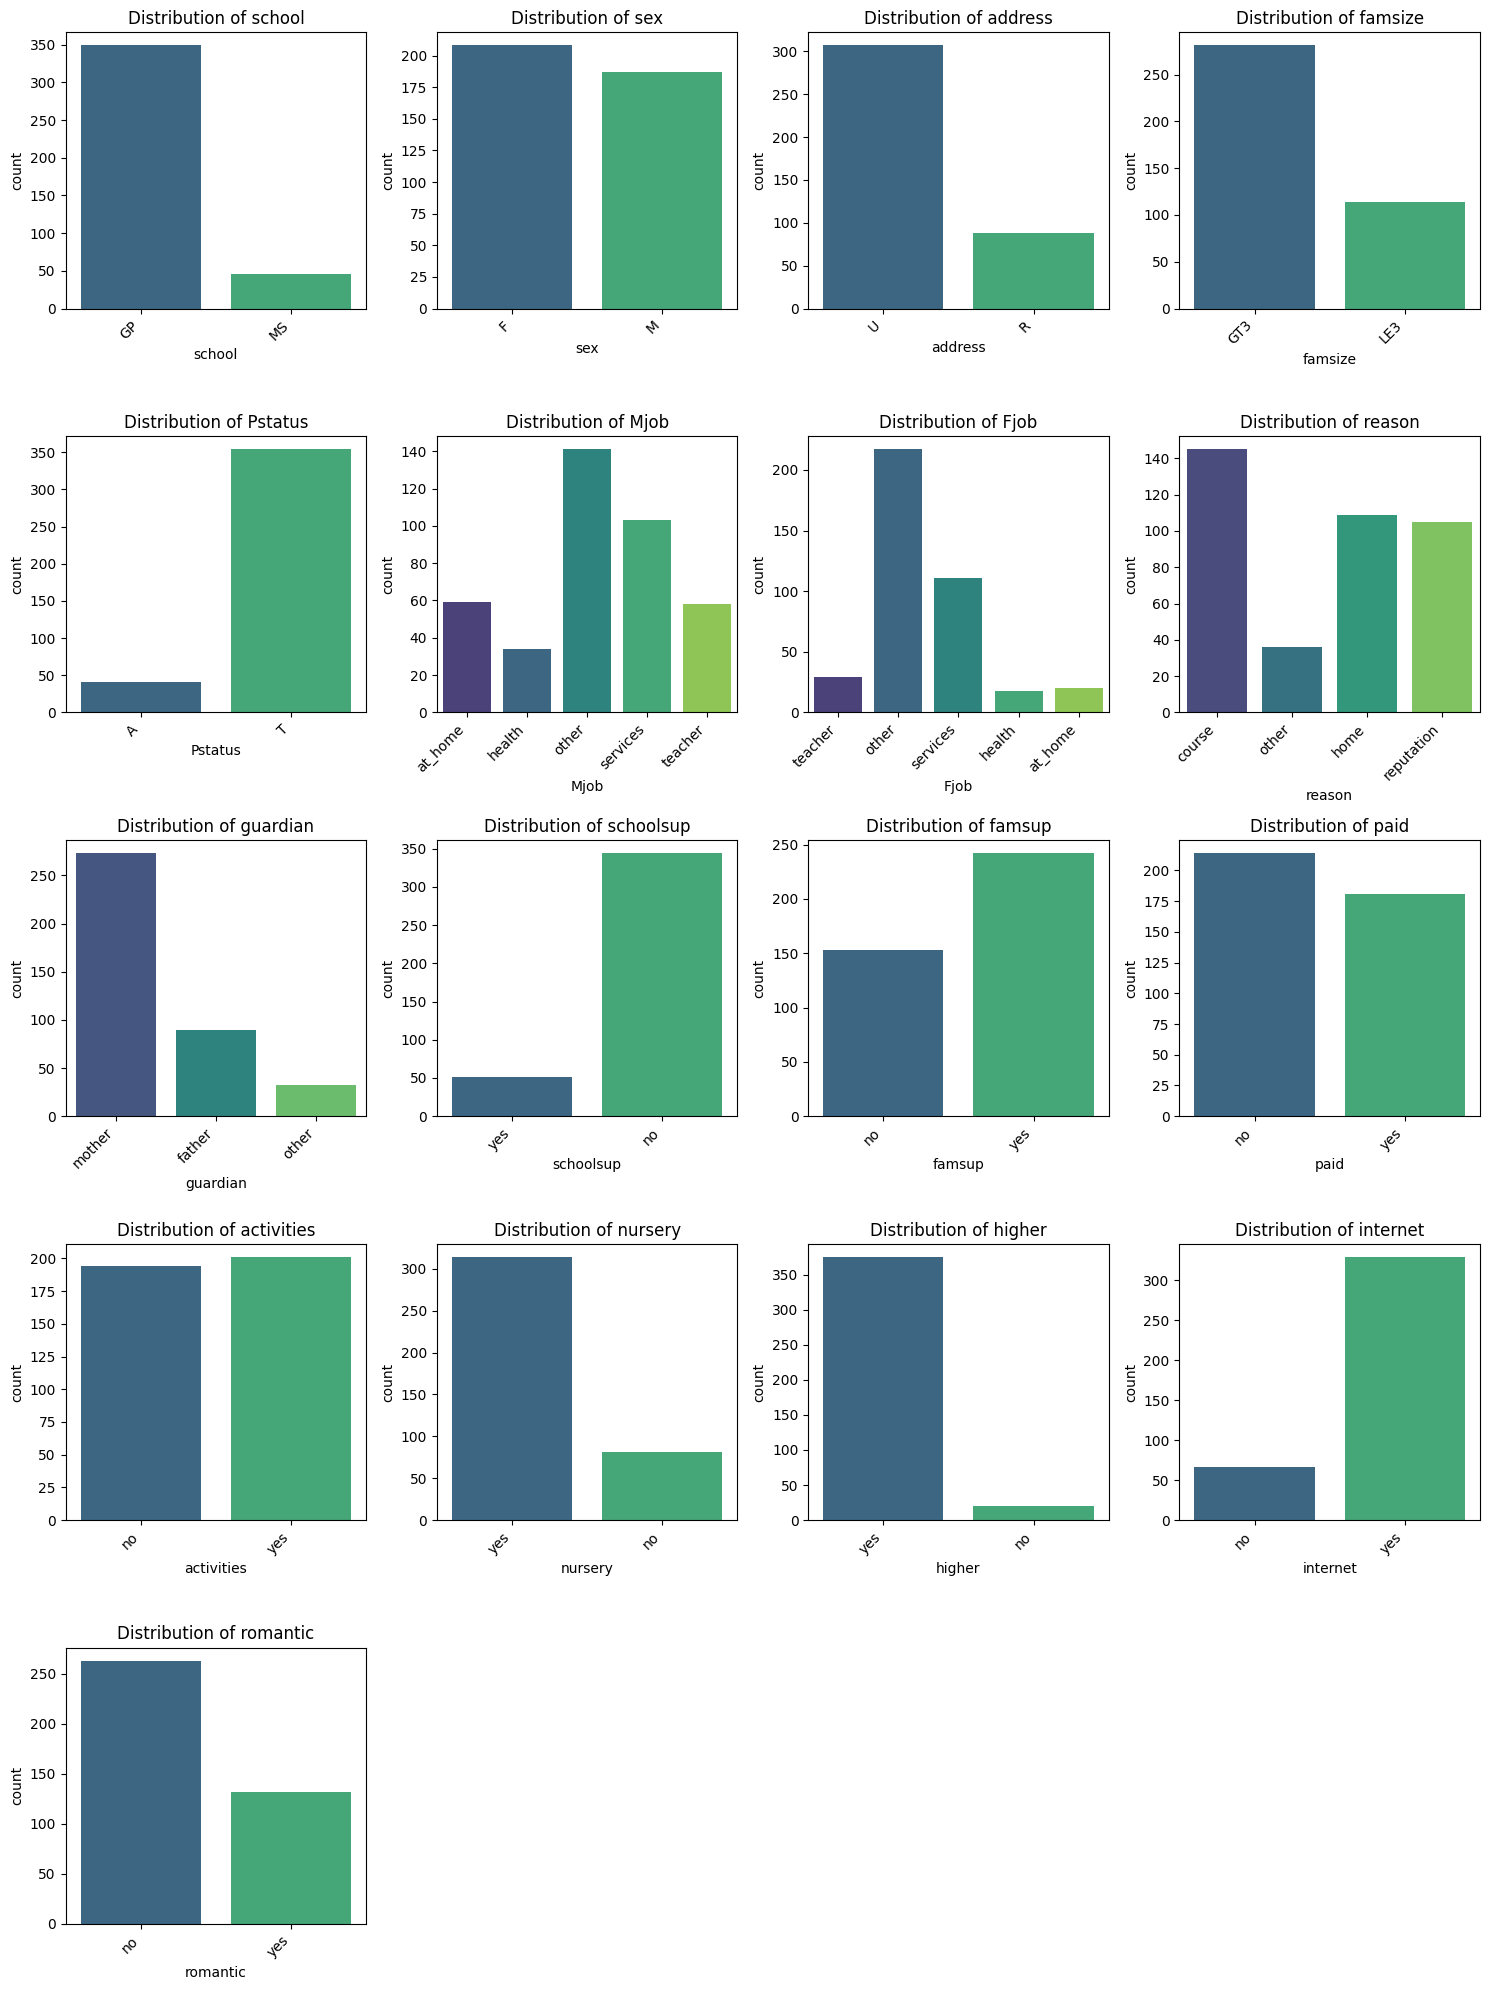

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Categorical Features:", list(categorical_features))

# Visualize distributions of categorical features
num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols # Calculate number of rows needed
plt.figure(figsize=(15, 4 * num_rows)) # Adjusted figure size dynamically

for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1) # Adjust subplot grid based on the number of features
    sns.countplot(x=feature, data=df, palette='viridis', hue=feature, legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

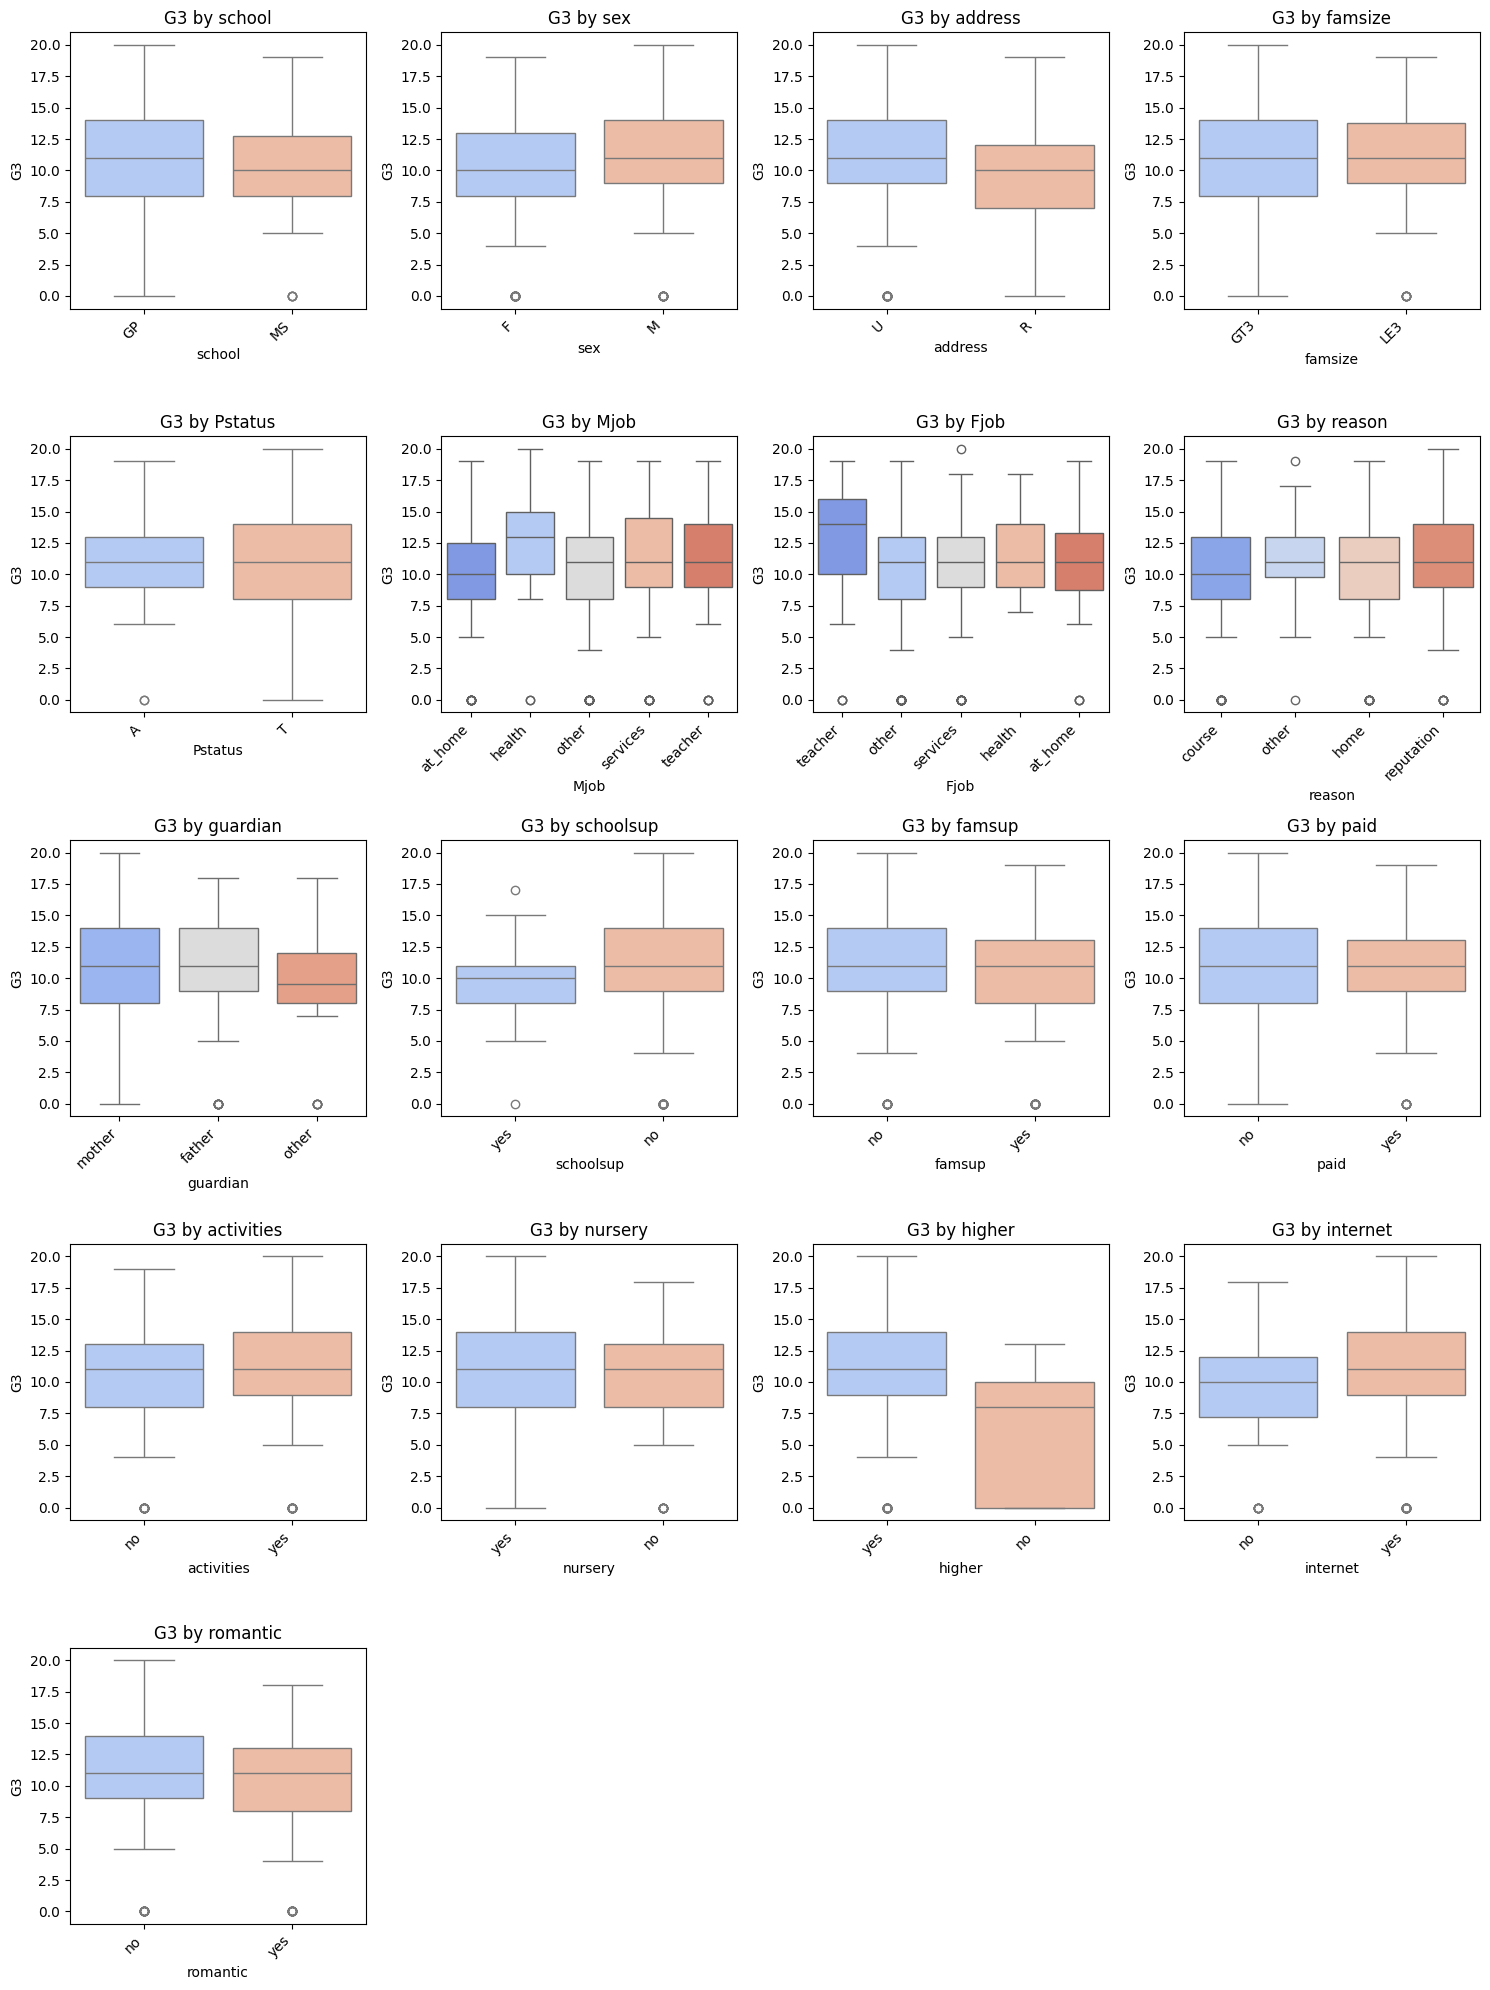

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore relationship between categorical features and the target variable (G3)
num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols # Calculate number of rows needed
plt.figure(figsize=(15, 4 * num_rows)) # Adjusted figure size dynamically

for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1) # Adjust subplot grid based on the number of features
    sns.boxplot(x=feature, y='G3', data=df, palette='coolwarm', hue=feature, legend=False)
    plt.title(f'G3 by {feature}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

